## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0  46.113934   517.746625  0.762677  3.670834  1.449849
1  83.284498   899.138302  0.691411  4.718054  1.577303
2  64.860464   686.174160  0.907259  8.487450  1.391143
3  39.372237  1557.643112  0.919991  8.070753  1.638642
4  47.034828  1102.493214  0.308395  5.103056  1.429820


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.027471
0:	learn: 0.8942550	total: 65.1ms	remaining: 1m 4s
1:	learn: 0.8869364	total: 65.7ms	remaining: 32.8s
2:	learn: 0.8780194	total: 67.9ms	remaining: 22.6s
3:	learn: 0.8709303	total: 68.4ms	remaining: 17s
4:	learn: 0.8613223	total: 68.7ms	remaining: 13.7s
5:	learn: 0.8535472	total: 69.1ms	remaining: 11.5s
6:	learn: 0.8446849	total: 69.6ms	remaining: 9.87s
7:	learn: 0.8358393	total: 70.3ms	remaining: 8.71s
8:	learn: 0.8289792	total: 70.7ms	remaining: 7.79s
9:	learn: 0.8226941	total: 71.1ms	remaining: 7.04s
10:	learn: 0.8142796	total: 71.6ms	remaining: 6.44s
11:	learn: 0.8057578	total: 72.1ms	remaining: 5.94s
12:	learn: 0.7990036	total: 72.6ms	remaining: 5.51s
13:	learn: 0.7910156	total: 73ms	remaining: 5.14s
14:	learn: 0.7841290	total: 73.1ms	remaining: 4.8s
15:	learn: 0.7767531	total: 73.5ms	remaining: 4.52s
16:	learn: 0.7687950	total: 73.9ms	remaining: 4.27s
17:	learn: 0.7628031	total: 74.3ms	remaining: 4.05s
18:	learn: 0.7552636	total: 74.7ms	remaining: 3.8

157:	learn: 0.3141944	total: 147ms	remaining: 781ms
158:	learn: 0.3128553	total: 147ms	remaining: 778ms
159:	learn: 0.3110231	total: 148ms	remaining: 774ms
160:	learn: 0.3096468	total: 148ms	remaining: 771ms
161:	learn: 0.3084359	total: 148ms	remaining: 767ms
162:	learn: 0.3069705	total: 149ms	remaining: 764ms
163:	learn: 0.3057164	total: 155ms	remaining: 789ms
164:	learn: 0.3041511	total: 155ms	remaining: 785ms
165:	learn: 0.3036220	total: 156ms	remaining: 782ms
166:	learn: 0.3024578	total: 156ms	remaining: 778ms
167:	learn: 0.3011240	total: 156ms	remaining: 775ms
168:	learn: 0.2995039	total: 157ms	remaining: 771ms
169:	learn: 0.2983399	total: 157ms	remaining: 769ms
170:	learn: 0.2973166	total: 158ms	remaining: 766ms
171:	learn: 0.2961664	total: 158ms	remaining: 762ms
172:	learn: 0.2950911	total: 159ms	remaining: 759ms
173:	learn: 0.2940885	total: 159ms	remaining: 756ms
174:	learn: 0.2923541	total: 160ms	remaining: 752ms
175:	learn: 0.2911794	total: 160ms	remaining: 749ms
176:	learn: 

416:	learn: 0.1422065	total: 282ms	remaining: 394ms
417:	learn: 0.1417069	total: 282ms	remaining: 393ms
418:	learn: 0.1410590	total: 283ms	remaining: 392ms
419:	learn: 0.1403672	total: 283ms	remaining: 391ms
420:	learn: 0.1399812	total: 284ms	remaining: 390ms
421:	learn: 0.1395000	total: 284ms	remaining: 389ms
422:	learn: 0.1390230	total: 284ms	remaining: 388ms
423:	learn: 0.1387157	total: 285ms	remaining: 387ms
424:	learn: 0.1381270	total: 285ms	remaining: 386ms
425:	learn: 0.1378341	total: 286ms	remaining: 385ms
426:	learn: 0.1372451	total: 286ms	remaining: 384ms
427:	learn: 0.1369571	total: 287ms	remaining: 383ms
428:	learn: 0.1362843	total: 287ms	remaining: 382ms
429:	learn: 0.1356280	total: 288ms	remaining: 381ms
430:	learn: 0.1352637	total: 288ms	remaining: 380ms
431:	learn: 0.1346264	total: 288ms	remaining: 379ms
432:	learn: 0.1342704	total: 289ms	remaining: 379ms
433:	learn: 0.1338315	total: 290ms	remaining: 378ms
434:	learn: 0.1332192	total: 292ms	remaining: 379ms
435:	learn: 

718:	learn: 0.0651402	total: 428ms	remaining: 167ms
719:	learn: 0.0649696	total: 428ms	remaining: 166ms
720:	learn: 0.0647510	total: 428ms	remaining: 166ms
721:	learn: 0.0645712	total: 429ms	remaining: 165ms
722:	learn: 0.0644303	total: 429ms	remaining: 164ms
723:	learn: 0.0642580	total: 430ms	remaining: 164ms
724:	learn: 0.0639438	total: 430ms	remaining: 163ms
725:	learn: 0.0638559	total: 431ms	remaining: 163ms
726:	learn: 0.0636493	total: 431ms	remaining: 162ms
727:	learn: 0.0634750	total: 431ms	remaining: 161ms
728:	learn: 0.0633076	total: 432ms	remaining: 161ms
729:	learn: 0.0630035	total: 432ms	remaining: 160ms
730:	learn: 0.0629766	total: 433ms	remaining: 159ms
731:	learn: 0.0629500	total: 433ms	remaining: 158ms
732:	learn: 0.0629239	total: 433ms	remaining: 158ms
733:	learn: 0.0627603	total: 434ms	remaining: 157ms
734:	learn: 0.0627344	total: 434ms	remaining: 156ms
735:	learn: 0.0625341	total: 434ms	remaining: 156ms
736:	learn: 0.0623388	total: 435ms	remaining: 155ms
737:	learn: 

854:	learn: 0.0486988	total: 521ms	remaining: 88.4ms
855:	learn: 0.0486344	total: 522ms	remaining: 87.7ms
856:	learn: 0.0485904	total: 522ms	remaining: 87.1ms
857:	learn: 0.0484758	total: 522ms	remaining: 86.5ms
858:	learn: 0.0484125	total: 523ms	remaining: 85.8ms
859:	learn: 0.0483451	total: 523ms	remaining: 85.2ms
860:	learn: 0.0481783	total: 524ms	remaining: 84.5ms
861:	learn: 0.0480764	total: 524ms	remaining: 83.9ms
862:	learn: 0.0480330	total: 524ms	remaining: 83.2ms
863:	learn: 0.0479216	total: 525ms	remaining: 82.6ms
864:	learn: 0.0478787	total: 525ms	remaining: 81.9ms
865:	learn: 0.0477795	total: 525ms	remaining: 81.3ms
866:	learn: 0.0477643	total: 526ms	remaining: 80.6ms
867:	learn: 0.0476793	total: 526ms	remaining: 80ms
868:	learn: 0.0475831	total: 526ms	remaining: 79.3ms
869:	learn: 0.0474743	total: 527ms	remaining: 78.8ms
870:	learn: 0.0474322	total: 528ms	remaining: 78.1ms
871:	learn: 0.0473765	total: 528ms	remaining: 77.5ms
872:	learn: 0.0473143	total: 528ms	remaining: 76

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
print("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)
print("ABC Pre-generator MAE",mae)

Prior Model MAE 0.5097861461142736


ABC Pre-generator MAE 0.5147861461142738


# mGAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.DiscriminatorTabnet(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

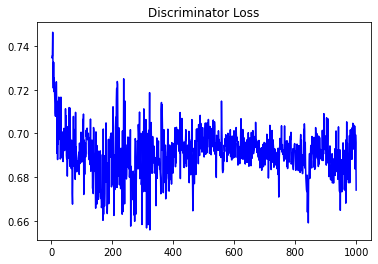

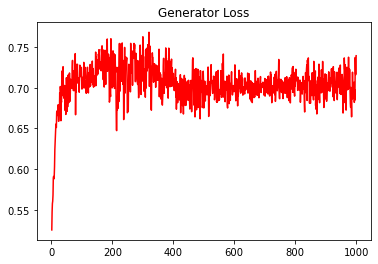

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MAE")
print(mean(ABC_GAN1_metrics[1]))

MAE
0.7230487305205315


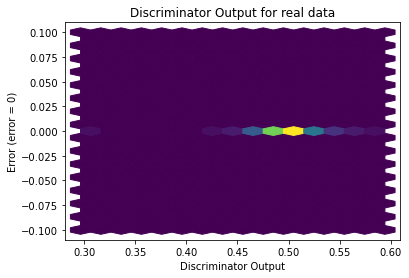

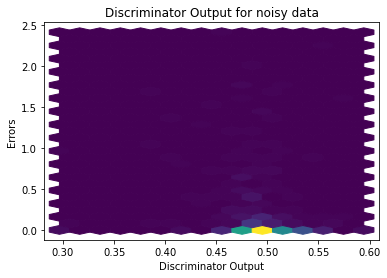

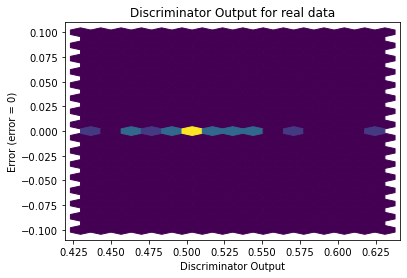

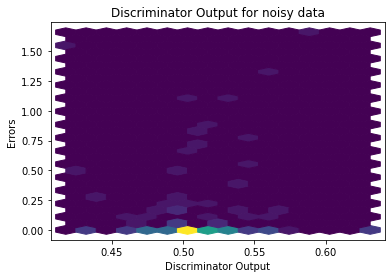

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# mGAN Model with TabNet Generator

In [15]:
gen2 = network.GeneratorTabnet(n_features+1).to(device)
disc2 = network.DiscriminatorTabnet(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen2.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc2.parameters(), lr=0.001, betas=(0.5, 0.999))

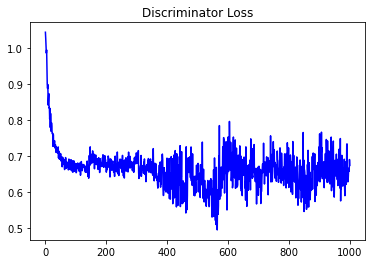

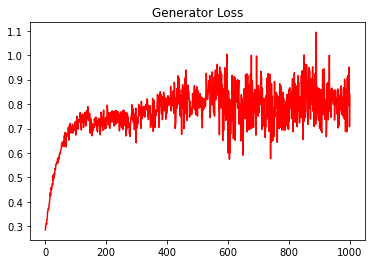

In [16]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc2,gen2,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN2_metrics=ABC_train_test2.test_generator(gen2,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_2 Metrics",ABC_GAN2_metrics)

print("MAE")
print(mean(ABC_GAN2_metrics[1]))

MAE
0.9189809659961611


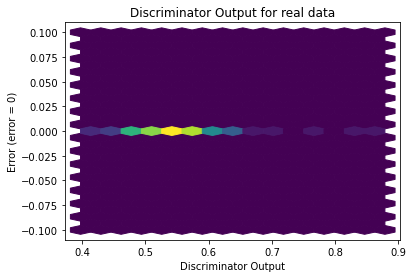

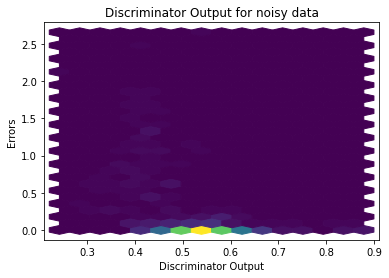

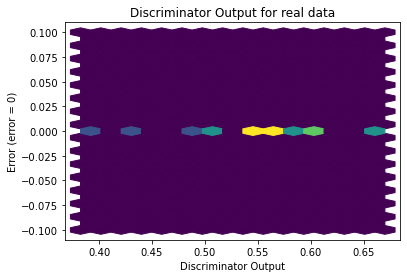

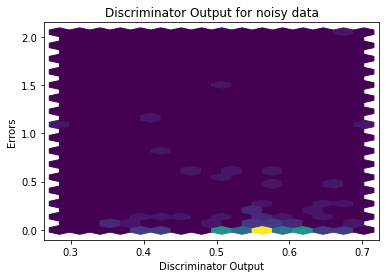

In [18]:
sanityChecks.discProbVsError(train_data,disc2,device)
sanityChecks.discProbVsError(test_data,disc2,device)

# skipGAN Model

In [19]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.DiscriminatorTabnet(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


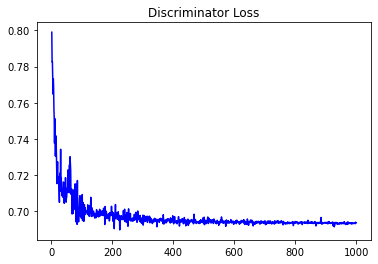

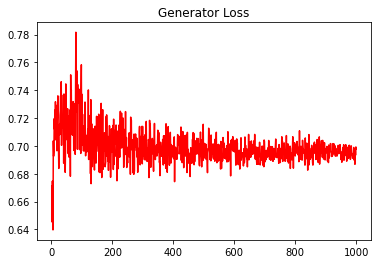

In [20]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [21]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MAE")
print(mean(ABC_GAN3_metrics[1]))

MAE
0.5894939167890698


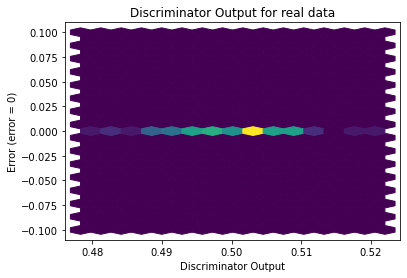

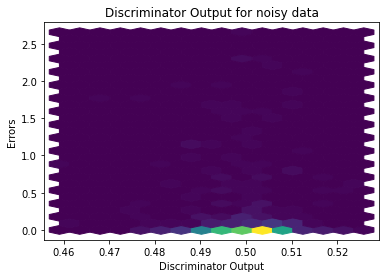

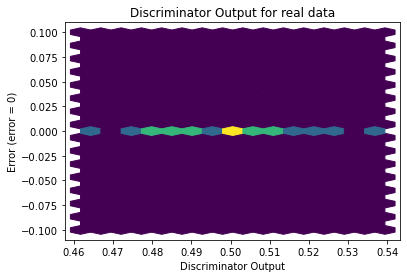

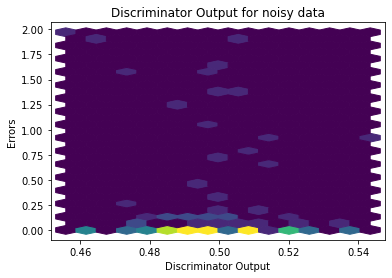

In [22]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

# skipGAN Model with TabNet Generator

In [23]:
#Generator
gen4 = network.GeneratorTabnetskipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc4 = network.DiscriminatorTabnet(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen4.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc4.parameters(), lr=0.001, betas=(0.5, 0.999))


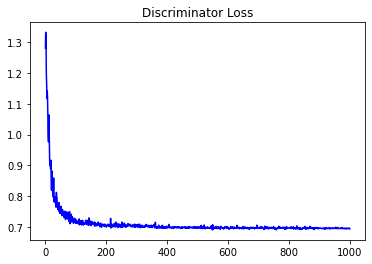

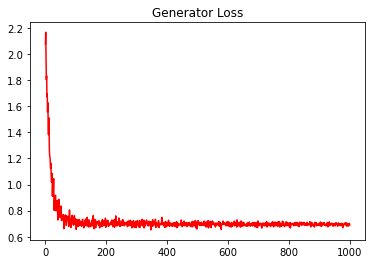

In [24]:
ABC_train_test2.training_GAN_skip_connection(disc4,gen4,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [25]:
ABC_GAN4_metrics=ABC_train_test2.test_generator(gen4,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_4 Metrics",ABC_GAN4_metrics)

print("MAE")
print(mean(ABC_GAN4_metrics[1]))

MAE
0.5051378941629082


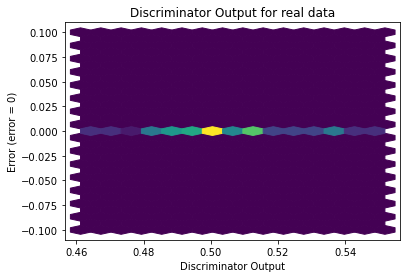

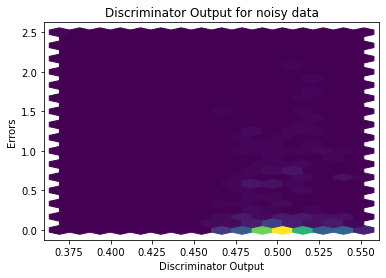

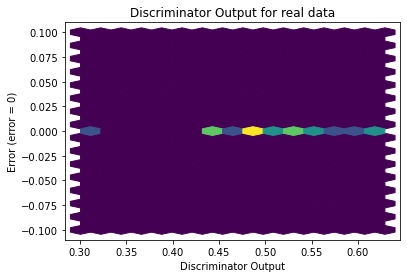

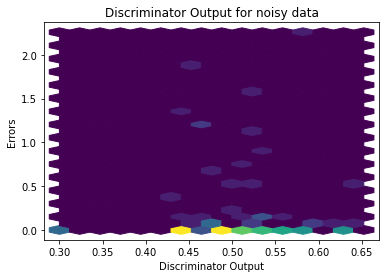

In [26]:
sanityChecks.discProbVsError(train_data,disc4,device)
sanityChecks.discProbVsError(test_data,disc4,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [27]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.4535]], requires_grad=True)


## skipGAN Model Analysis (TabNet Generator) 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [28]:
print("Weight of the node at skip connection")
for name,param in gen4.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0106]], requires_grad=True)
